# MSc Data Science: (deep) discriminative models for **MNIST**

# Loading useful stuff

In [78]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
from tensorflow.keras import initializers

tfk = tf.keras
tfkl = tf.keras.layers
tfd = tfp.distributions

#Loading and normalising MNIST

In [79]:
(train_images, y_train), (test_images,  y_test) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28*28)
test_images = test_images.reshape(test_images.shape[0], 28*28)

y_train = tf.cast(y_train, tf.int32)
y_test =tf.cast(y_test, tf.int32)

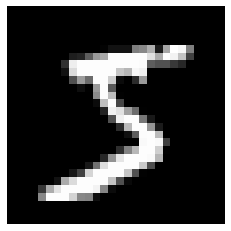

In [80]:
plt.imshow(train_images[0, :].reshape((28,28)), cmap='gray')
plt.axis('off')
plt.show()

In [81]:
# Normalizing the images to the range of [0., 1.]
train_images = train_images/255.
test_images = test_images/255.

1.0
0.7906022716363347


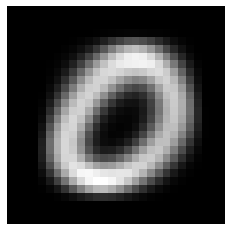

In [82]:
import pandas as pd
print(np.max(train_images[0,:]))
mean_0 = np.mean(train_images[y_train == 0], axis=0)/np.max(mean_0)
print(np.max(mean_0))
plt.imshow(mean_0.reshape((28,28)), cmap='gray')
plt.axis('off')
plt.show()

# Logistic regression

Our goal is to build a classifier on MNIST. A first simple example of classifier is **logistic regression**, a particular case of **discriminative model**. The model for (multiclass) logistic regression is 
$$ p (y | \mathbf{x} ) = \text{Cat} (y |\text{Softmax}(\mathbf{W}\mathbf{x}+\mathbf{b})),$$
where the unknown parameters are $\mathbf{W}$ and $\mathbf{b}$.

**Question 1.** What are the dimensions of $\mathbf{W}$ and $\mathbf{b}$? What is the total number of parameters in the model?

$$W\in\mathbb{R}^{784\times784}$$
$$b\in\mathbb{R}^{784}$$

In [20]:
train_images[0].shape

(784,)

We will build our logistic regression model using [**keras**](https://keras.io/), a nice deep learning API. In particular, keras's [sequential model](https://keras.io/guides/sequential_model/) is simple way of building compositions of parametric functions.

In [5]:
logistic_regression = tfk.Sequential([
  tfkl.InputLayer(input_shape=[28*28,]),
  tfkl.Dense(10, kernel_initializer=initializers.RandomNormal(stddev=1)) # because we have 10 classes
])

Here, $\texttt{logistic_regression}$ represents the function $ \mathbf{x} \mapsto \mathbf{W}\mathbf{x}+\mathbf{b}$, that takes vectors as inputs, and returns probabilities for each class. We can try with the first MNIST image. The model is initialised by sampling each coefficient of $\mathbf{W}$ from a standard Gaussian distribution.

In [6]:
logistic_regression(train_images[0:1,])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[  4.957146  ,  -1.5937662 , -11.296676  ,   4.0661845 ,
          5.3883862 ,   0.08968258,   4.046138  ,  19.116106  ,
          5.9716907 ,   2.6989236 ]], dtype=float32)>

Note that the output is a Tensorflow tensor. One can easily get a Numpy array instead this way:

In [7]:
logistic_regression(train_images[0:1,]).numpy()

array([[  4.957146  ,  -1.5937662 , -11.296676  ,   4.0661845 ,
          5.3883862 ,   0.08968258,   4.046138  ,  19.116106  ,
          5.9716907 ,   2.6989236 ]], dtype=float32)

This $\texttt{logistic_regression}$ conveniently can also handle **batches** of inputs. Here we look at the predictions of the 10 first digits of MNIST.

In [91]:
tf.nn.softmax(logistic_regression(train_images[0:10,]).numpy())

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[9.19034518e-03, 1.22150436e-06, 9.13724829e-09, 5.04491389e-01,
        2.69801006e-07, 4.56146151e-01, 1.15229050e-04, 2.98278928e-02,
        1.22637051e-04, 1.04851228e-04],
       [9.99578059e-01, 1.62885287e-12, 1.99091343e-09, 1.01623385e-07,
        3.83498531e-07, 2.12623709e-04, 2.96950966e-05, 1.61425807e-04,
        5.82766745e-07, 1.70990170e-05],
       [3.04732035e-04, 5.60324587e-09, 4.89987144e-07, 5.01623617e-05,
        1.20544545e-01, 7.27342242e-10, 1.46382081e-04, 5.48300516e-10,
        8.78846943e-01, 1.06800573e-04],
       [1.67324921e-11, 9.99699235e-01, 7.99294939e-05, 7.05517550e-06,
        1.05706931e-06, 1.24190201e-05, 5.20269859e-05, 3.25387965e-08,
        1.47963234e-04, 3.41209756e-07],
       [1.57138818e-08, 2.59365237e-07, 5.38553369e-10, 1.94413960e-08,
        1.40428519e-05, 1.14459084e-07, 2.46329179e-08, 2.55801915e-05,
        3.96089597e-08, 9.99959946e-01],
       [1.49020491e-06, 5

One can check that each row of these predictions sums to one:

In [92]:
np.sum(tf.nn.softmax(logistic_regression(train_images[0:10,]), axis=1).numpy(),1)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999976, 1.0000001 , 1.0000001 , 1.        , 0.9999999 ],
      dtype=float32)

One can us Tensorflow Probability to create the distribution  $p (y | \mathbf{x} )$

In [93]:
p_ygivenx_logistic_regression = tfd.Categorical(logits = logistic_regression(train_images[0:10,]))

In [94]:
p_ygivenx_logistic_regression.sample() # sampling the predicted labels

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([5, 0, 8, 1, 9, 2, 8, 9, 1, 4], dtype=int32)>

In [95]:
p_ygivenx_logistic_regression.mode() # looking at the most probable labels

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([3, 0, 8, 1, 9, 2, 8, 9, 1, 4], dtype=int32)>

# Training the logistic regression model

To train the classifier, we define a function that performs a gradient descent step. First, we choose the flavour of SGD that we want (in this case, the [fairly famous Adam](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam)).

In [13]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)

In [14]:
@tf.function
def train_step_logistic_regression(data, labels):
  with tf.GradientTape() as tape: # the gradient tape saves all the step that needs to be saved fopr automatic differentiation
    p_ygivenx_logistic_regression = tfd.Categorical(logits = logistic_regression(data)) # One could also use logits rather than probs and remove the softmax layer...
    logp_ygivenx_logistic_regression = p_ygivenx_logistic_regression.log_prob(labels)
    loss = -tf.reduce_mean(logp_ygivenx_logistic_regression)  # the loss is the average negative log likelihood
  gradients = tape.gradient(loss, logistic_regression.trainable_variables)  # here, the gradient is automatically computed
  optimizer.apply_gradients(zip(gradients, logistic_regression.trainable_variables))  # Adam iteration

In [15]:
@tf.function
def evaluate_logistic_regression(data, labels):
  p_ygivenx_logistic_regression = tfd.Categorical(logits = logistic_regression(data))
  logp_ygivenx_logistic_regression = p_ygivenx_logistic_regression.log_prob(labels)
  log_likelihood = tf.reduce_mean(logp_ygivenx_logistic_regression)
  y_pred = p_ygivenx_logistic_regression.mode()
  acc = tf.reduce_mean(tf.cast(y_pred == labels,tf.float32))
  return acc, log_likelihood

In [16]:
 evaluate_logistic_regression(train_images,y_train)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.08895>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-13.199782>)

In [17]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images,y_train)).shuffle(60000).batch(32) # TF creates the batches for us

In [18]:
EPOCHS = 10

for epoch in range(1,EPOCHS+1):
  for images, labels in train_dataset:
    train_step_logistic_regression(images, labels) # Adam iteration
  acc, log_likelihood = evaluate_logistic_regression(train_images,y_train)
  acc_test, log_likelihood_test = evaluate_logistic_regression(test_images,y_test)
  print('Epoch  %g' %epoch)
  print('Train accuracy  %g' %acc.numpy())
  print('Test accuracy  %g' %acc_test.numpy())
  print('Train log-likelihood  %g' %log_likelihood.numpy())
  print('Test log-likelihood  %g' %log_likelihood_test.numpy())
  print('-----------')

Epoch  1
Train accuracy  0.145983
Test accuracy  0.1504
Train log-likelihood  -8.6573
Test log-likelihood  -8.63199
-----------
Epoch  2
Train accuracy  0.231533
Test accuracy  0.2457
Train log-likelihood  -6.39438
Test log-likelihood  -6.34201
-----------
Epoch  3
Train accuracy  0.317467
Test accuracy  0.3308
Train log-likelihood  -4.89728
Test log-likelihood  -4.84088
-----------
Epoch  4
Train accuracy  0.40465
Test accuracy  0.4143
Train log-likelihood  -3.81866
Test log-likelihood  -3.76308
-----------
Epoch  5
Train accuracy  0.486033
Test accuracy  0.4965
Train log-likelihood  -3.06041
Test log-likelihood  -3.00296
-----------
Epoch  6
Train accuracy  0.551067
Test accuracy  0.5613
Train log-likelihood  -2.54242
Test log-likelihood  -2.48152
-----------
Epoch  7
Train accuracy  0.60165
Test accuracy  0.6123
Train log-likelihood  -2.18408
Test log-likelihood  -2.12193
-----------
Epoch  8
Train accuracy  0.639967
Test accuracy  0.6532
Train log-likelihood  -1.92648
Test log-like

In [86]:
print(logistic_regression(train_images[0:1,]), y_train[0], "", sep="\n")
evaluate_logistic_regression(train_images[0:1,:],y_train[0])

tf.Tensor(
[[ 6.5466747 -2.3791492 -7.2746267 10.552074  -3.8893034 10.451341
   2.1676915  7.7239656  2.2299993  2.0733109]], shape=(1, 10), dtype=float32)
tf.Tensor(5, shape=(), dtype=int32)



(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.7849399>)

In [88]:
evaluate_logistic_regression(train_images[0:1,:]+mean_0, y_train[0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-6.9726176>)

**Question 2.** Compare the results of your logistic regression classifier with the ones given by scikit-learn's logistic regression.

**Question 3.** Replace the logistic regression model by a deep classifier of your choice (e.g. a MLP or a CNN). Try to beat logistic regression!